打音データ取り込み  
・データをプロット  
・FFT実施→可視化  
・スペクトログラム作成  
・メルスペクトログラム作成

/Users/ab520221/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


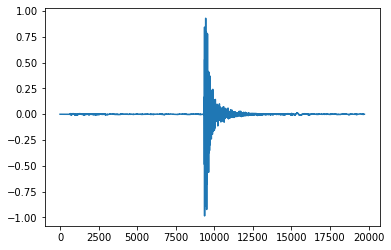

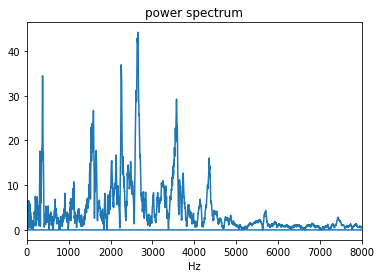

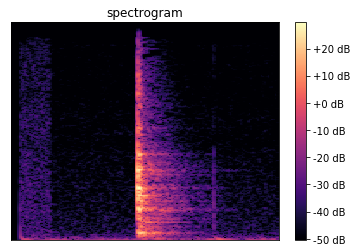

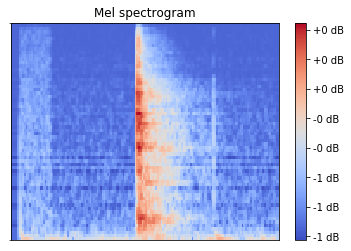

In [7]:
import numpy as np
import matplotlib.pyplot as plt #グラフ描画ライブラリ
import librosa
import librosa.display #表示のためにdisplay モジュールを使用

%matplotlib inline

#　パスを指定し、librosaでloadする
audio_path = '/Users/ab520221/U研_打音判別/打音サンプル/ボルト/unnormal1.m4a' #パスを保存
y, sr = librosa.load(audio_path) #波形情報とサンプリングレートを代入

#　データをplotする
plt.plot(y)
plt.show()

##### 周波数スペクトルを表示する #####
#縦軸：dataを高速フーリエ変換する（時間領域から周波数領域に変換する）
fft_data = np.abs(np.fft.fft(y))    
#横軸：周波数の取得　　#np.fft.fftfreq(データ点数, サンプリング周期)
freqList = np.fft.fftfreq(y.shape[0], d=1.0/sr)  
#データプロット
plt.plot(freqList, fft_data)
plt.xlim(0, 8000) #0～8000Hzまで表示
plt.xlabel('Hz')
plt.title('power spectrum')
plt.show()

##### スペクトログラムを表示する #####
# フレーム長
fft_size = 512                 
# フレームシフト長 
hop_length = int(fft_size / 4)  

# 短時間フーリエ変換実行
amplitude = np.abs(librosa.core.stft(y, n_fft=fft_size, hop_length=hop_length))

# 振幅をデシベル単位に変換
log_power = librosa.core.amplitude_to_db(amplitude)

# グラフ表示
librosa.display.specshow(log_power, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
librosa.display.specshow(log_power, sr=sr, hop_length=hop_length, cmap='magma')
plt.colorbar(format='%+2.0f dB')  
plt.title('spectrogram')
plt.show() 

##### メルスペクトログラムを表示する #####

# メルスペクトログラム計算
amplitude_2 = amplitude**2
log_stft = librosa.power_to_db(amplitude_2)
melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=64)

# グラフ表示
librosa.display.specshow(melsp, sr=sr, x_axis="time", y_axis="mel", hop_length=hop_length)
librosa.display.specshow(melsp, sr=sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

表題やサイドバー等が無い画像作成  
・スペクトログラム作成  
・メルスペクトログラム作成

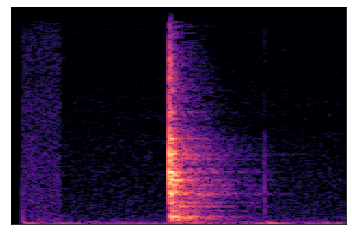

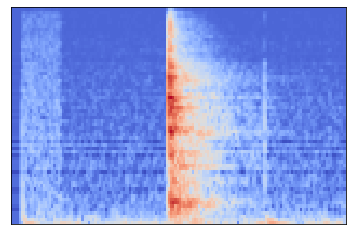

In [10]:
# グラフ表示
#librosa.display.specshow(log_power, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
librosa.display.specshow(log_power, sr=sr, hop_length=hop_length, cmap='magma')
#plt.colorbar(format='%+2.0f dB')  
#plt.title('spectrogram')
plt.show() 

# グラフ表示
#librosa.display.specshow(melsp, sr=sr, x_axis="time", y_axis="mel", hop_length=hop_length)
librosa.display.specshow(melsp, sr=sr, hop_length=hop_length)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel spectrogram')
plt.show()

In [ ]:
画像を上下反転、左右反転、180度回転

In [11]:
import os
from PIL import Image, ImageOps

path = "/Users/ab520221/U研_打音判別/データ生成/画像/ボルト/d1/"

path_np = "/Users/ab520221/U研_打音判別/データ生成/画像/ボルト/d1/np/"

path_lr = "/Users/ab520221/U研_打音判別/データ生成/画像/ボルト/d1/lr/"

path_ud = "/Users/ab520221/U研_打音判別/データ生成/画像/ボルト/d1/ud/"

path_180 = "/Users/ab520221/U研_打音判別/データ生成/画像/ボルト/d1/180/"

files = []
pngs = []
for x in os.listdir(path):  
    if os.path.isfile(path + x):  #パスに取り出したオブジェクトを足してフルパスに
        files.append(x)
        
for y in files:
    if(y[-4:] == '.png'):     #ファイル名の後ろ4文字を取り出してそれが.txtなら
        pngs.append(y)  #リストに追加

print(pngs)

for name in pngs:
   print(name) 
   im = Image.open(path + name)
   im_rgb = Image.open(path + name).convert('RGB')
   
   #ネガポジ
   im_invert = ImageOps.invert(im_rgb)
   im_invert.save(path_np + 'np_' + name)
    
   #左右反転
   Image.fromarray(np.fliplr(im)).save(path_lr + 'lr_' + name )
    
   #上下反転
   Image.fromarray(np.flipud(im)).save(path_ud + 'ud_' + name )
    
   # 180度回転
   Image.fromarray(np.flip(im, (0, 1))).save(path_180 + '180' + name)
    

['unnormal_melspec_13.png', 'unnormal_melspec_12.png', 'unnormal_melspec_38.png', 'unnormal_melspec_39.png', 'unnormal_melspec_29.png', 'unnormal_melspec_16.png', 'unnormal_melspec_17.png', 'unnormal_melspec_58.png', 'unnormal_melspec_59.png', 'unnormal_melspec_8.png', 'unnormal_melspec_49.png', 'unnormal_melspec_48.png', 'unnormal_melspec_60.png', 'unnormal_melspec_45.png', 'unnormal_melspec_7.png', 'unnormal_melspec_51.png', 'unnormal_melspec_6.png', 'unnormal_melspec_50.png', 'unnormal_melspec_44.png', 'unnormal_melspec_4.png', 'unnormal_melspec_46.png', 'unnormal_melspec_47.png', 'unnormal_melspec_53.png', 'unnormal_melspec_5.png', 'unnormal_melspec_1.png', 'unnormal_melspec_57.png', 'unnormal_melspec_42.png', 'unnormal_melspec_56.png', 'unnormal_melspec_54.png', 'unnormal_melspec_2.png', 'unnormal_melspec_55.png', 'unnormal_melspec_3.png', 'unnormal_melspec_41.png', 'unnormal_melspec_26.png', 'unnormal_melspec_32.png', 'unnormal_melspec_33.png', 'unnormal_melspec_27.png', 'unnorma